# Cleaning and analyzing data from the VQA model 

In [39]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/neuro140/Desktop/humor_detection/data/VQA_ratings.csv').T
df_final = pd.read_csv('/Users/neuro140/Desktop/humor_detection/data/df_final.csv')
df.columns = ['label1', 'label2']
df.label1 = df.label1.astype('str')
results = pd.DataFrame(df.label1.value_counts())
results = results.reset_index()
results.columns = ['VQA unique output', 'Count']

In [40]:
import random
random.seed(140)

def map_to_number(ele):
    if ele == 'not very':
        return int(random.randint(2,4))
    elif ele == 'very':
        return int(random.randint(7,9))
    elif ele == 'not at all':
        return int(1)
    elif (ele == 'not sure') or (ele == 'not too') or (ele == 'no eggs') or (ele== 'no') or (ele=='not possible'):
        return int(random.randint(1,10))
    elif (ele == '0'):
        return int(1)
    else:
        return ele
    
def map_to_description(ele):
    if ele == 'not very':
        return "A random integer between 2 and 4"
    elif ele == 'very':
        return "A random integer between 7 and 9"
    elif ele == 'not at all':
        return int(1)
    elif (ele == 'not sure') or (ele == 'not too') or (ele == 'no eggs') or (ele== 'no') or (ele=='not possible'):
        return "A random integer between 1 and 10"
    elif (ele == '0'):
        return "1 because we assume 0 is really not funny"
    else:
        return ele

results['New Value'] = results['VQA unique output'].apply(map_to_description) 
df['vqa_rank'] = df['label1'].apply(map_to_number) 

In [41]:
'''
Set numerical values as the model's "truth" value for each image 
'''

df = df.reset_index()
df.columns = ['image', 'vqa1', 'vqa2', 'vqa_rank']
df_final['control_avg'] = (df_final['control1'] + df_final['control2']) / 2
df_final['mturk_avg'] = (df_final['label1'] + df_final['label2']) / 2
df.vqa_rank = df.vqa_rank.astype('float')


In [42]:
df_final['avg'] = (df_final['control_avg'] + df_final['mturk_avg']) / 2
df_final['binary'] = df_final['avg'].apply(lambda x: 1 if x >= 5 else 0)
df_final['binary_control'] = df_final['control_avg'].apply(lambda x: 1 if x >= 5 else 0)
df_final['binary_mturk'] = df_final['mturk_avg'].apply(lambda x: 1 if x >= 5 else 0)

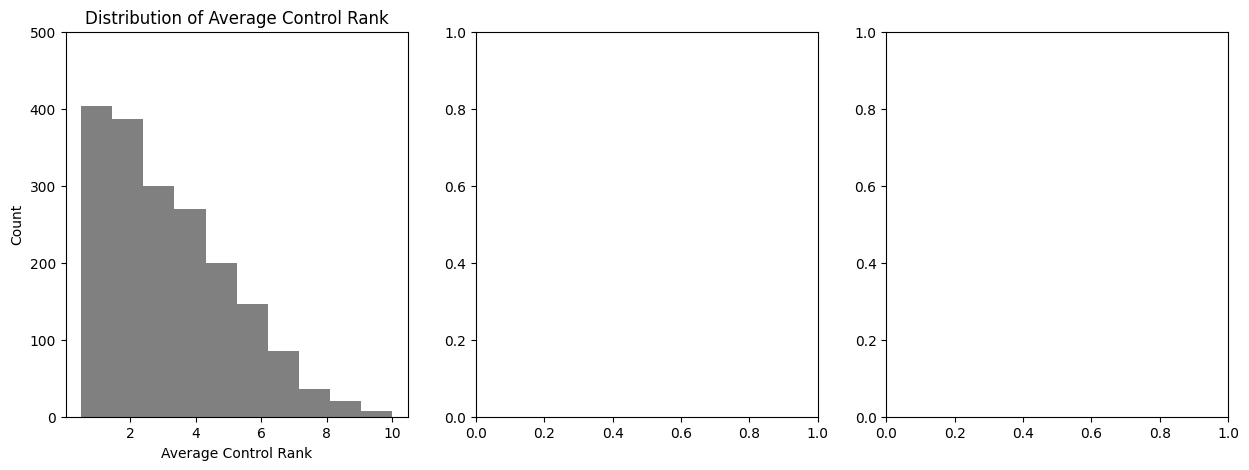

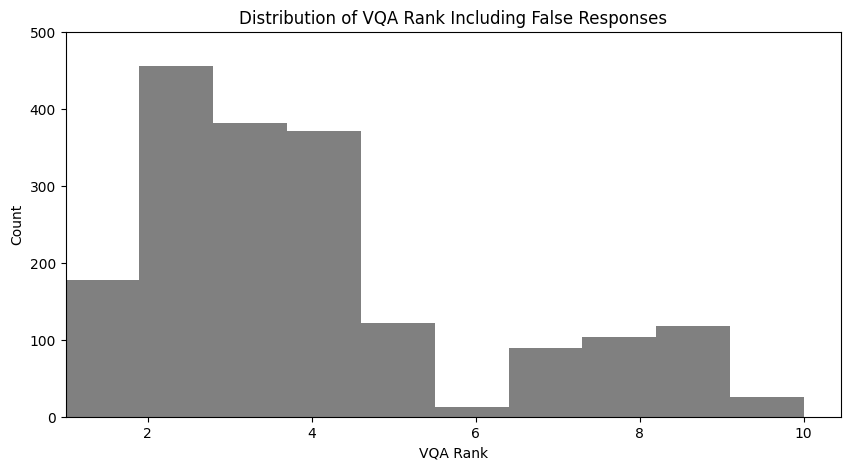

In [19]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

df['control_avg'].plot.hist(ax=ax1, color='grey', bins=10)
ax1.set_title('Distribution of Average Control Rank')
ax1.set_xlabel('Average Control Rank')
ax1.set_ylabel('Count')
ax1.set_ylim(0, 500)


fig, ax = plt.subplots(figsize=(10,5))
df['vqa_rank'].plot.hist(subplots=True, color='grey', bins=10)
plt.title('Distribution of VQA Rank Including False Responses')
plt.xlabel('VQA Rank')
plt.ylabel('Count')
plt.ylim(0, 500)
plt.xlim(1, None)
plt.show()

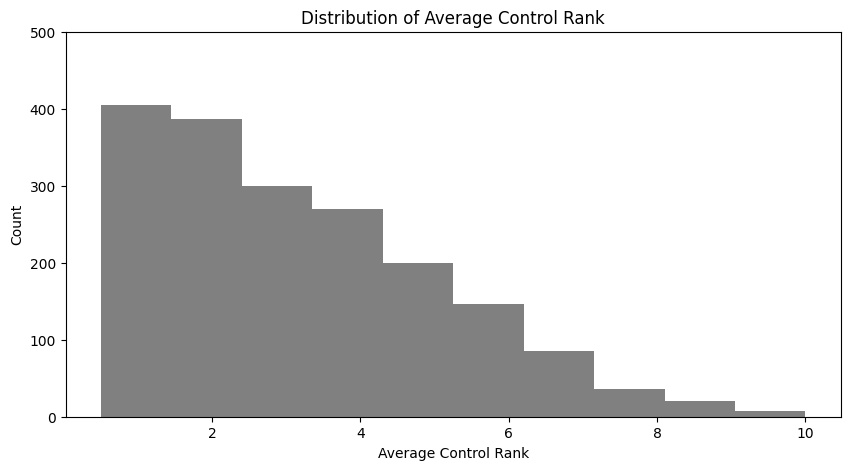

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
df_final['control_avg'].plot.hist(subplots=True, color='grey', bins=10)
plt.title('Distribution of Average Control Rank')
plt.xlabel('Average Control Rank')
plt.ylabel('Count')
plt.ylim(0, 500)
plt.show()

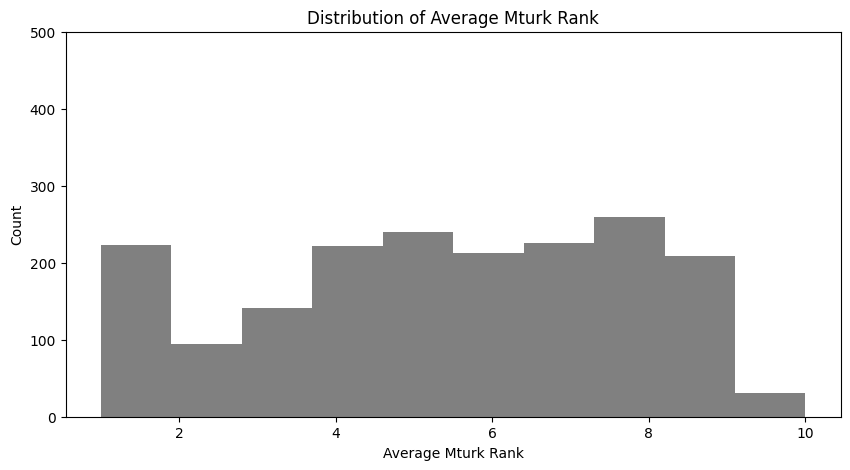

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
df_final['mturk_avg'].plot.hist(subplots=True, color='grey', bins=10)
plt.title('Distribution of Average Mturk Rank')
plt.xlabel('Average Mturk Rank')
plt.ylabel('Count')
plt.ylim(0, 500)
plt.show()

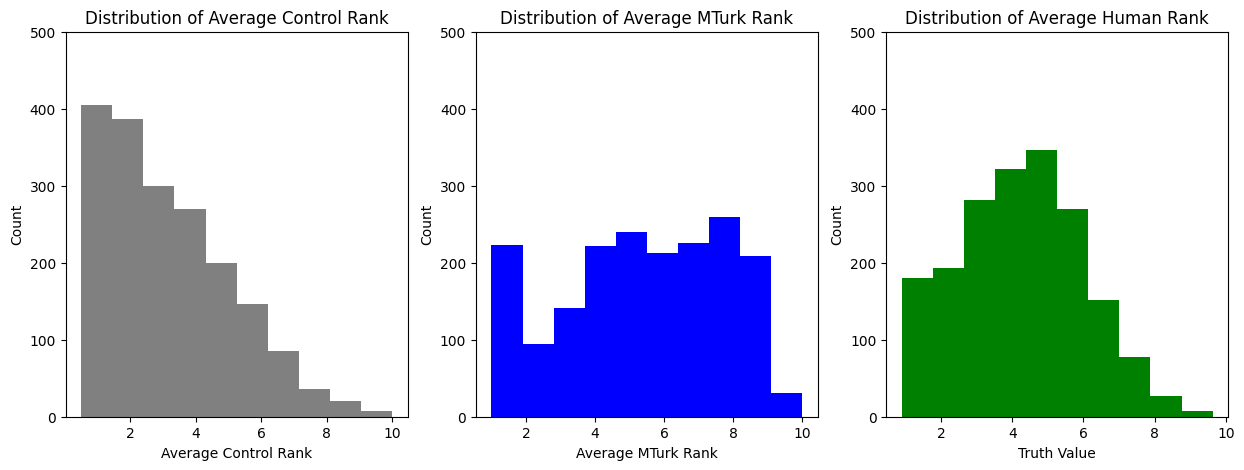

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

df_final['control_avg'].plot.hist(ax=ax1, color='grey', bins=10)
ax1.set_title('Distribution of Average Control Rank')
ax1.set_xlabel('Average Control Rank')
ax1.set_ylabel('Count')
ax1.set_ylim(0, 500)

df_final['mturk_avg'].plot.hist(ax=ax2, color='blue', bins=10)
ax2.set_title('Distribution of Average MTurk Rank')
ax2.set_xlabel('Average MTurk Rank')
ax2.set_ylabel('Count')
ax2.set_ylim(0, 500)

df_final['avg'].plot.hist(ax=ax3, color='green', bins=10)
ax3.set_title('Distribution of Average Human Rank')
ax3.set_xlabel('Truth Value')
ax3.set_ylabel('Count')
ax3.set_ylim(0, 500)
# df['vqa_rank'].plot.hist(ax=ax3, color='green', bins=10)
# ax3.set_title('Distribution of VQA Rank')
# ax3.set_xlabel('VQA Rank')
# ax3.set_ylabel('Count')
# ax3.set_ylim(0, 500)

plt.show()


In [43]:
df = pd.merge(df, df_final, on="image")
df



,image,vqa1,vqa2,vqa_rank,control1,control2,label1,label2,description1,description2,avg,label,control_avg,mturk_avg,binary,binary_control,binary_mturk
0,image478.jpg,very,very,7.0,6.0,3.0,5.2,7.8,Bra's of joy,Covered in bras.,5.500,1,4.5,6.50,1,0,1
1,image336.jpg,5,5,5.0,3.0,2.0,1.3,6.4,Amazonians,Happy family time,3.175,0,2.5,3.85,0,0,0
2,image450.jpg,not very,not very,2.0,3.0,7.0,3.0,7.7,Must have been a relative,Oranges have funeral.,5.175,1,5.0,5.35,1,1,1
3,image1781.jpg,not very,not very,3.0,3.0,2.0,8.4,7.6,Train waiting too.,Train is waiting too.,5.250,1,2.5,8.00,1,0,1
4,image1795.jpg,not at all,not at all,1.0,6.0,2.0,1.0,7.8,I hate dogs.,Dogs hiding in blanket.,4.200,0,4.0,4.40,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851,image449.jpg,not very,not very,2.0,3.0,4.0,7.1,7.8,God as funny old man,God is confused.,5.475,1,3.5,7.45,1,0,1
1852,image307.jpg,no,no,9.0,2.0,3.0,4.3,2.9,Child playing a game,Boy playing video game.,3.050,0,2.5,3.60,0,0,0
1853,image461.jpg,no,no,3.0,1.0,7.0,2.8,6.7,Lady laughing,Woman is happy.,4.375,0,4.0,4.75,0,0,0
1854,image475.jpg,not very,not very,4.0,6.0,5.0,10.0,7.8,goat tongue out,Goat wearing glasses.,7.200,1,5.5,8.90,1,1,1


In [52]:
##Determining how well the VQA model did 

# Define function to check if model response is within 1.5 of true value
def check_accuracy(row):
    if abs(row['vqa_rank'] - row['avg']) <= 5.5:
        return 1
    else:
        return 0

# Apply function to create new column in dataframe
df['accuracy'] = df.apply(check_accuracy, axis=1)

# Create a list of thresholds to test
thresholds = np.arange(0, 10, 0.1)

# Create a list to store accuracy values for each threshold
accuracies = {}

# Calculate accuracy for each threshold
# for t in thresholds:
#     accuracy = df[df['vqa_rank'].between(df['avg']-t, df['avg']+t)]['accuracy'].mean()
#     accuracies[t] = accuracy

# accuracies = pd.DataFrame(accuracies)
df['accuracy'].mean()

# Plot the relationship between threshold and accuracy
# plt.plot(thresholds, accuracies)
# plt.xlabel('Threshold')
# plt.ylabel('Accuracy')
# plt.title('Accuracy vs Threshold')
# plt.show()




0.39762931034482757